# Genderový rozdíl v platech celosvětově: jak to vypadá teď a jak se bude rozvíjet dál?

## Přehled dat

Pro analýzu jsem si využila data, které jsem našla na strankách [International labor organization](https://ilostat.ilo.org/topics/wages/). Tabulka obsahuje informaci o středních měsíčních platech ve všech státech světa. Data jsou rozdělena podle pohlaví a povolání.

<details>
<summary>Oficiální popis:</summary>
With the aim of promoting international comparability, statistics presented on ILOSTAT are based on standard international definitions wherever feasible and may differ from official national figures. This series is based on the 13th ICLS definitions. For time series comparability, it includes countries that have implemented the 19th ICLS standards, for which data are also available in the Work Statistics -- 19th ICLS (WORK) database. The earnings of employees relate to the gross remuneration in cash and in kind paid to employees, as a rule at regular intervals, for time worked or work done together with remuneration for time not worked, such as annual vacation, other type of paid leave or holidays. Earnings exclude employers' contributions in respect of their employees paid to social security and pension schemes and also the benefits received by employees under these schemes. Earnings also exclude severance and termination pay. This is a harmonized series: (1) data reported as weekly, monthly and yearly are converted to hourly using data on average weekly hours if available; and (2) data are converted to U.S. dollars as the common currency, using exchange rates or using purchasing power parity (PPP) rates for private consumption expenditures. The latter series allows for international comparisons by taking account of the differences in relative prices between countries. Data disaggregated by occupation are provided according to the latest version of the International Standard Classification of Occupations (ISCO). Data may have been regrouped from the national classifications, which may not be strictly compatible with ISCO. For more information, refer to the Wages and Working Time Statistics (COND) database description.

</details>

In [ ]:
# First of all we need to import all needed labraries
!pip install powerbiclient  # for working with power bi files in this notebook
import pandas as pd
import numpy as np
from powerbiclient import Report, models

In [20]:
# Let's open the original table and have a look on it
data_raw = pd.read_excel('average_monthly_earnings_by_sex_and_occupation_cleaned_table.xlsx')
#display(data_raw.head(15))  # in case I need to show presice amount of rows
data_raw

,Country,Source,Sex,Occupation,Time,Local currency,2017 PPP $,U.S. dollars,Unnamed: 8
0,Afghanistan,HIES - Households Living Conditions Survey,Total,Total,2014,8848.57,498.43,154.57,Notes\n\nAverage monthly earnings of employees...
1,Afghanistan,HIES - Households Living Conditions Survey,Total,1. Managers,2014,17310.44,975.09,302.38,Notes\n\nAverage monthly earnings of employees...
2,Afghanistan,HIES - Households Living Conditions Survey,Total,2. Professionals,2014,10508.62,591.94,183.56,Notes\n\nAverage monthly earnings of employees...
3,Afghanistan,HIES - Households Living Conditions Survey,Total,3. Technicians and associate professionals,2014,12426.72,699.99,217.07,Notes\n\nAverage monthly earnings of employees...
4,Afghanistan,HIES - Households Living Conditions Survey,Total,4. Clerical support workers,2014,15291.69,861.37,267.12,Notes\n\nAverage monthly earnings of employees...
...,...,...,...,...,...,...,...,...,...
26310,Zimbabwe,LFS - Labour Force Survey,Female,"6. Skilled agricultural, forestry and fishery ...",2021,2433.02,0.96,NaN,Notes\n\nAverage monthly earnings of employees...
26311,Zimbabwe,LFS - Labour Force Survey,Female,7. Craft and related trades workers,2021,9162.74,3.62,NaN,Notes\n\nAverage monthly earnings of employees...
26312,Zimbabwe,LFS - Labour Force Survey,Female,"8. Plant and machine operators, and assemblers",2021,26357.84,10.42,NaN,Notes\n\nAverage monthly earnings of employees...
26313,Zimbabwe,LFS - Labour Force Survey,Female,9. Elementary occupations,2021,3959.26,1.56,NaN,Notes\n\nAverage monthly earnings of employees...


## Jak celkově v různých státech vypadá wage gap za poslední léta?
Nejdřív jsem původní tabulku odfiltrovat a nechala povolání total 
(což je střední veličinou všech povolání) pro znázorněný obecný 
přehled.
*(Je to uděláno i v tomto souboru, i pomoci scriptu 
sort_by_occupation.py na GitHubu).*

In [21]:
sort_by_occupation = ["Total"]

data_sorted_by_occupation = data_raw[data_raw['Occupation'].isin(sort_by_occupation)]

#display(data_sorted_by_occupation.head(10))  # in case I need to show presice amount of rows

data_sorted_by_occupation

,Country,Source,Sex,Occupation,Time,Local currency,2017 PPP $,U.S. dollars,Unnamed: 8
0,Afghanistan,HIES - Households Living Conditions Survey,Total,Total,2014,8848.57,498.43,154.57,Notes\n\nAverage monthly earnings of employees...
12,Afghanistan,HIES - Households Living Conditions Survey,Male,Total,2014,9135.15,514.58,159.57,Notes\n\nAverage monthly earnings of employees...
24,Afghanistan,HIES - Households Living Conditions Survey,Female,Total,2014,5517.31,310.79,96.38,Notes\n\nAverage monthly earnings of employees...
34,Afghanistan,LFS - Labour Force Survey,Total,Total,2020,13202.24,NaN,171.87,Notes\n\nAverage monthly earnings of employees...
46,Afghanistan,LFS - Labour Force Survey,Male,Total,2020,13439.39,NaN,174.96,Notes\n\nAverage monthly earnings of employees...
...,...,...,...,...,...,...,...,...,...
26258,Zimbabwe,LFS - Labour Force Survey,Male,Total,2019,337.69,19.01,NaN,Notes\n\nAverage monthly earnings of employees...
26269,Zimbabwe,LFS - Labour Force Survey,Female,Total,2019,266.47,15.00,NaN,Notes\n\nAverage monthly earnings of employees...
26280,Zimbabwe,LFS - Labour Force Survey,Total,Total,2021,13935.05,5.51,NaN,Notes\n\nAverage monthly earnings of employees...
26292,Zimbabwe,LFS - Labour Force Survey,Male,Total,2021,13633.44,5.39,NaN,Notes\n\nAverage monthly earnings of employees...


Pro zobrazování grafů v této části jsem použila vizualizaci v Power Bi. Pro zobrazení reportu je nutné nejdřív pustit kód dole. Tam se objeví microsoft link a kód, který je třeba napsat na lince pro autentifikaci.

*Pak se bude nutné přihlásit do svého power bi účtu. Doufám, že všechno zafunguje, pokud ne, tento report je součásti projektu na GitHubu, nachází se ve složce reports a jmenuje se gender_wage_gap_report.pbix.*


In [ ]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

device_auth = DeviceCodeLoginAuthentication()

In [23]:
from google.colab import output
output.enable_custom_widget_manager()

group_id="fe6a6871-8e82-4621-bb81-66df4b8196ce"
report_id="b79a9f4e-141d-4bc8-a76c-39ba0b7edc89"
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report

Report()

## Rozdíl v platech v lokální měně i v %



Poté jsem vyčistila původní tabulku a ponechala pouze sloupce s pohlavím (bez řádků Total) pomocí skriptu *sort_male_female.py*. Výslednou tabulku jsem použila k výpočtu rozdílů ve mzdách v lokální měně a následně jsem tyto rozdíly vypočítala i v procentech pomocí skriptu wage_gap_diff.py. Výsledná data jsem uložila do nové tabulky wage_gap_worldwide.xlsx, se kterou budu nadále pracovat.

<details>
<summary>Proč probíhá filtrování tabulky pomocí vlastního skriptu a ne zde?</summary>
Vyskytl se nějaký problém s kódem, který zde vedl k chybě, proto jsem se rozhodla provést filtraci zvlášť.
</details>

<details>
<summary>Proč jsem počítala v lokální měně?</summary>
V původní tabulce nebyly u všech zemí uvedeny mzdy v USD. Nicméně, pracuji s rozdíly v procentech, které jsou stejné jak pro lokální měny, tak pro USD.
</details>


In [24]:
df = pd.read_excel('wage_gap_worldwide.xlsx')
df

,Unnamed: 0,Country,Occupation,Year,Difference in local currency,Difference in % of local currency
0,0,Afghanistan,Total,2014,3617.84,0.655725
1,1,Afghanistan,1. Managers,2014,2772.44,0.188316
2,2,Afghanistan,2. Professionals,2014,3501.94,0.450108
3,3,Afghanistan,3. Technicians and associate professionals,2014,4044.76,0.444166
4,4,Afghanistan,4. Clerical support workers,2014,2982.42,0.237619
...,...,...,...,...,...,...
8026,8026,Viet Nam,5. Service and sales workers,2015,649847.44,0.167310
8027,8027,Viet Nam,"6. Skilled agricultural, forestry and fishery ...",2015,950674.41,0.271507
8028,8028,Viet Nam,7. Craft and related trades workers,2015,507040.60,0.121819
8029,8029,Viet Nam,"8. Plant and machine operators, and assemblers",2015,754229.70,0.145036


Z tabulky **wage_gap_worldwide.xlsx** lze jednoduše zobrazit grafy rozdílu mezd pro všechna uvedená povolání v konkrétním státě pro všechna léta.

Můžeme se podívat na rozdíly mezd pro konkrétní stát a všechna povolání.

In [25]:
import plotly.express as px
df = pd.read_excel('wage_gap_worldwide.xlsx')

#df = df[df['Occupation']=='Total']  # choose an occupation we want to show stats for
df = df[df['Country'] == 'Czechia']  # choose a country we want to show stats for
df['Difference in % of local currency'] = df['Difference in % of local currency'] * 100
unique_occup = df.drop_duplicates(subset = 'Occupation')

for elem in unique_occup['Occupation']:
  tmp_df = df[df['Occupation']==elem] 
  fig = px.histogram(tmp_df, x = 'Country', y = 'Difference in % of local currency', facet_col= 'Year', text_auto = '.2f', template = 'presentation', title = elem)
  fig.update_layout(template="plotly_dark" )
  fig.show()



---



## Predikce rozdílu v platech na 10 let

### Lineární regresní analýza pro všechna data

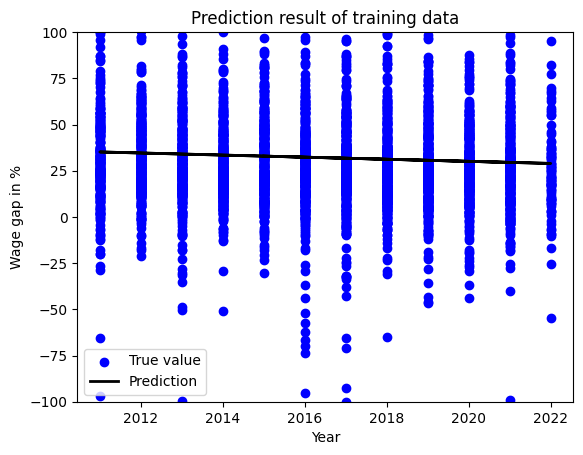

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

df = pd.read_excel('wage_gap_worldwide.xlsx')
df = df[df['Occupation'] != 'Total'] 
df['Difference in % of local currency'] = df['Difference in % of local currency'] * 100
x = df['Year']
y = df['Difference in % of local currency']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)  # split dataframe in test and train data

# make all arrays 2-dimensional because linear_model.LinearRegression() can work only with this kind of arrays
x_train = np.array(x_train).reshape((len(x_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

x_test = np.array(x_test).reshape(len(x_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)

plt.figure()
plt.scatter(x_train, y_train, color='blue', label="True value")
plt.plot(x_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction result of training data')
plt.legend()
plt.ylim([-100, 100])
plt.show()

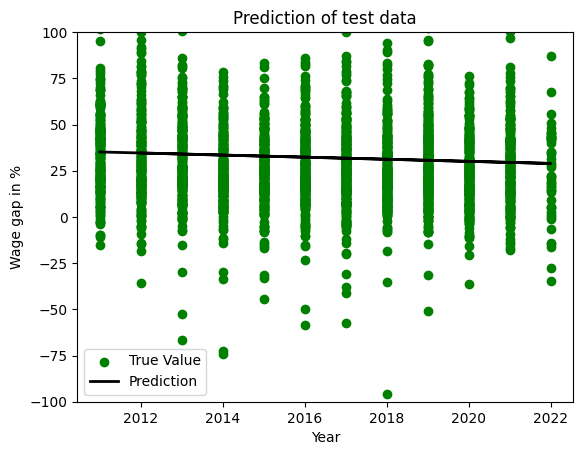

In [33]:
y_test_pred = model.predict(x_test)

plt.figure()
plt.scatter(x_test, y_test, color='green', label='True Value')
plt.plot(x_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction of test data')
plt.legend()
plt.ylim([-100, 100])
plt.show()

In [34]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 539593.6
Mean absolute error = 38
Explain variance score = -0.0
R2 score = -0.0


### Predikce na základě provedené analýzy

In [35]:
# Define the dates to make prediction for
future_dates = pd.date_range(start="2022", end="2032", freq="Y").year

# Define future indicates as 2-dimensional array
x_future_train = np.array(x_train).reshape((len(x_train),1))

y_pred = model.predict(x_future_train)  # prediction

# create df with predictions to show it
y_pred_10 = y_pred.flatten()[0:10]
predictions = pd.DataFrame({"timestamp": future_dates, "predicted_value": y_pred_10})
predictions

,timestamp,predicted_value
0,2022,32.897706
1,2023,30.074562
2,2024,28.945305
3,2025,32.897706
4,2026,29.509934
5,2027,35.156221
6,2028,31.768449
7,2029,32.897706
8,2030,31.203820
9,2031,34.026964


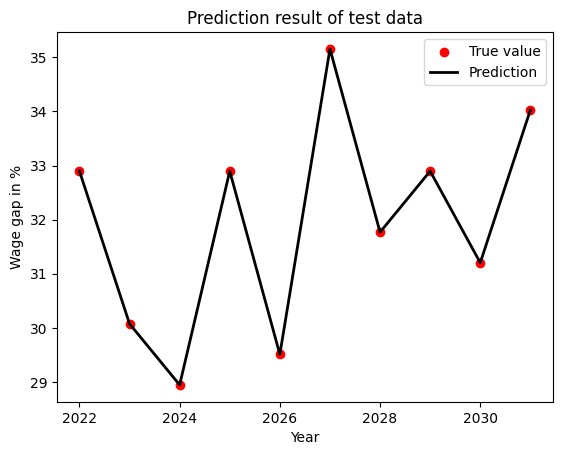

In [36]:
y_future_train = np.array(predictions['timestamp']).reshape((len(predictions['timestamp']),1))
plt.figure()
plt.scatter(predictions['timestamp'], predictions['predicted_value'], color='red', label='True value')
plt.plot(predictions['timestamp'], predictions['predicted_value'], color='black', linewidth=2, label='Prediction')

plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction result of test data')
plt.legend()
plt.show()

❗ Výsledek
Je vidět tendence ke snižování rozdílu mezd a podle predikce by se měl pohybovat kolem 30%. Nicméně, tento výsledek nelze považovat za validní, protože data jsou různorodá. Jednotlivé státy mají statistiky za různá období (například Afganistán má statistiky pouze za rok 2014 a za rok 2020), což komplikuje spolehlivou analýzu.

### Lineární regresní analýza pro konkretní státy




Rozhodla jsem se provést predikci pro státy, které mají dostupná data za stejné roky a nacházejí se v přibližně stejné oblasti.

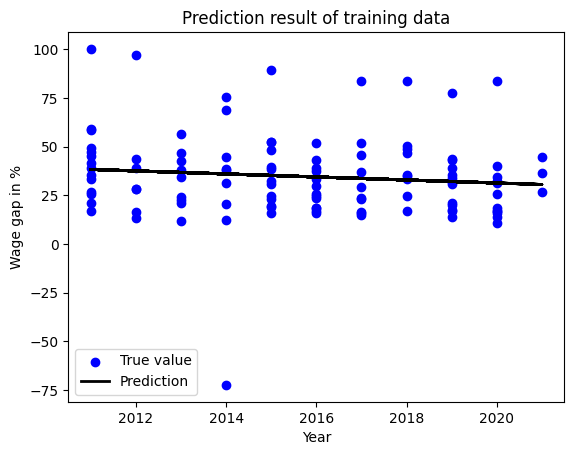

In [37]:
df = pd.read_excel('wage_gap_worldwide.xlsx')
df = df[(df['Country'] == 'United Kingdom') | (df['Country'] == 'Czechia')]  # here I can choose countries I'll make prediction for
df = df[df['Occupation'] != 'Total'] 
df['Difference in % of local currency'] = df['Difference in % of local currency'] * 100
x = df['Year']
y = df['Difference in % of local currency']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)  # split dataframe in test and train data

# make all arrays 2-dimensional because linear_model.LinearRegression() can work only with this kind of arrays
x_train = np.array(x_train).reshape((len(x_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

x_test = np.array(x_test).reshape(len(x_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)

plt.figure()
plt.scatter(x_train, y_train, color='blue', label="True value")
plt.plot(x_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction result of training data')
plt.legend()
plt.show()

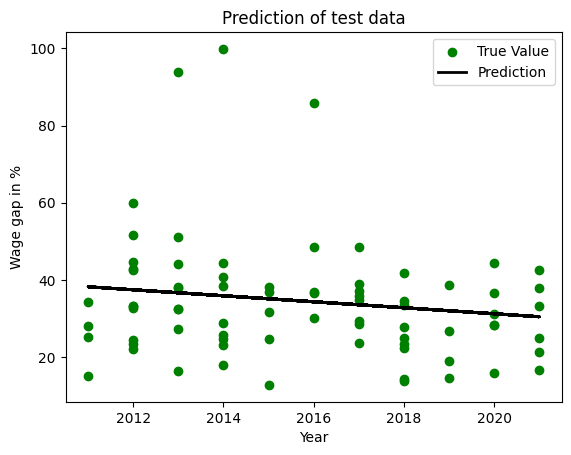

In [38]:
y_test_pred = model.predict(x_test)

plt.figure()
plt.scatter(x_test, y_test, color='green', label='True Value')
plt.plot(x_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction of test data')
plt.legend()
plt.show()

In [39]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 234.32
Mean absolute error = 10
Explain variance score = 0.03
R2 score = 0.03


### Predikce na základě provedené analýzy

In [40]:
# Define the dates to make prediction for
future_dates = pd.date_range(start="2022", end="2032", freq="Y").year

# Define future indicates as 2-dimensional array
x_future_train = np.array(x_train).reshape((len(x_train),1))

y_pred = model.predict(x_future_train)  # prediction

# create df with predictions to show it
y_pred_10 = y_pred.flatten()[0:10]
predictions = pd.DataFrame({"timestamp": future_dates, "predicted_value": y_pred_10})
predictions

,timestamp,predicted_value
0,2022,32.063384
1,2023,38.259712
2,2024,35.936089
3,2025,36.710630
4,2026,38.259712
5,2027,35.936089
6,2028,35.161548
7,2029,35.161548
8,2030,36.710630
9,2031,32.063384


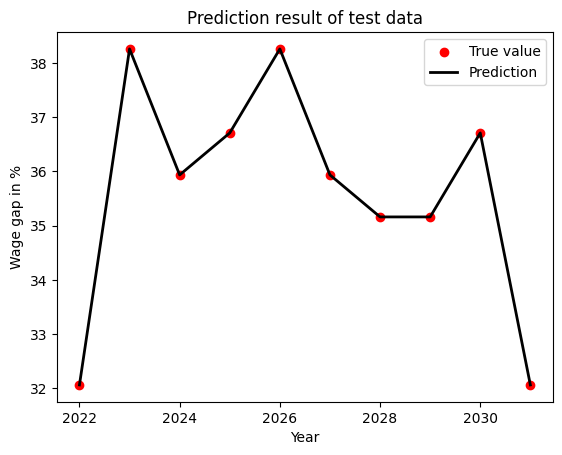

In [41]:
y_future_train = np.array(predictions['timestamp']).reshape((len(predictions['timestamp']),1))
plt.figure()
plt.scatter(predictions['timestamp'], predictions['predicted_value'], color='red', label='True value')
plt.plot(predictions['timestamp'], predictions['predicted_value'], color='black', linewidth=2, label='Prediction')

plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction result of test data')
plt.legend()
plt.show()

❗Výsledek

e opět patrná tendence ke snížení wage gapu a podle provedené predikce by se měl pohybovat kolem 30 %. Považuji tuto analýzu za spolehlivější, ale stále není ideální, a proto bych výsledky spíše brala jako orientační.

## Závěr

Z provedené počáteční analýzy je patrné, že muži ve všech státech mají vyšší průměrné měsíční platy a například v Česku se wage gap pohybuje kolem 30 %. Podle provedené predikce se očekává, že celosvětový wage gap bude klesat, ale stále se bude pohybovat kolem 30 %.

<details>
<summary>Na co si dát pozor při prohlížení výsledků?</summary>
Při prohlížení výsledků je třeba dbát na několik věcí. Data jsou různorodá, každý stát má uvedeny odlišné roky a nejsou zohledněny ekonomické jevy, jako je inflace. Například v reportu Power BI je zajímavé, jak se střední plat mužů v Albánii snížil z 3 408 USD v roce 2012 na 383 USD v roce 2015 (což by v procentuálním rozdílu nemuselo být tak výrazné).

Také je důležité si uvědomit, že průměrné platy jsou ovlivněny událostmi, jak na světové úrovni, tak v rámci jednotlivých států. Například v Česku byl v roce 2021 zaznamenán nárůst celkového rozdílu o 10 %, což může souviset s pandemií Covid-19.

Použité data jsou nejrozsáhlejší, která byla k dispozici, ale stále je třeba brát v úvahu jejich omezení.
</details>

<details>
<summary>Dávají výsledky predikce smysl?</summary>
Výsledky predikce mají smysl, ale s ohledem na upozornění uvedené v první otázce. Je také důležité poznamenat, že při výpočtu predikce pro 1 až 2 státy by výsledky byly přesnější díky menší různorodosti dat.
</details>

<details>
<summary>Co by bylo možné udělat jinak?</summary>
Pro dosažení ideální a důvěryhodné analýzy by bylo nutné provést samostatnou analýzu pro každý stát s použitím podrobných datasetů specifických pro daný stát a zohlednit ekonomický a sociální kontext.
</details>
